## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.outliers import z_score_outliers, iqr_outliers

## Configurations

In [39]:
# path for the training dataset
data_path = 'C:/Users/ansar/Desktop/Workspace/Personal/MLOPs/Customer Churn Prediction/api/artifacts/raw/train.csv'

# resetting pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis

In [3]:
# loading the dataset
df = pd.read_csv(data_path)

In [4]:
# viewing the frist 5 rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [5]:
# viewing the shape of the dataset
df.shape

(5634, 21)

In [6]:
# checking the information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [7]:
# checking the missing values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# checking the number of datatypes in the data
df.dtypes.value_counts()

object     18
int64       2
float64     1
Name: count, dtype: int64

In [9]:
# converting the TotalCharges feature into numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
# dropping the customerID column
df.drop('customerID', axis=1, inplace=True)

In [11]:
# separating numeric, categorical, target features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.difference(['SeniorCitizen']).tolist()
categorical_features = df.select_dtypes(include='object').columns.difference(['Churn']).tolist()
categorical_features.append('SeniorCitizen')
target = 'Churn'

### Analysing Numeric Features

In [12]:
# checking for missing values in TotalCharges feature
df['TotalCharges'].isnull().sum()

np.int64(10)

In [23]:
# dropping the null values
df['TotalCharges'] = df['TotalCharges'].fillna(0.0)

In [14]:
# viewing summary statistics
df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,5634.0,64.864253,30.089324,18.25,35.750,70.525,89.9375,118.6
TotalCharges,5634.0,2287.087948,2263.197899,0.00,406.275,1405.650,3806.6125,8684.8
tenure,5634.0,32.373092,24.424539,0.00,9.000,29.000,55.0000,72.0


In [15]:
# checking the skewness of numeric features
df[numeric_features].skew()

MonthlyCharges   -0.226248
TotalCharges      0.956097
tenure            0.239946
dtype: float64

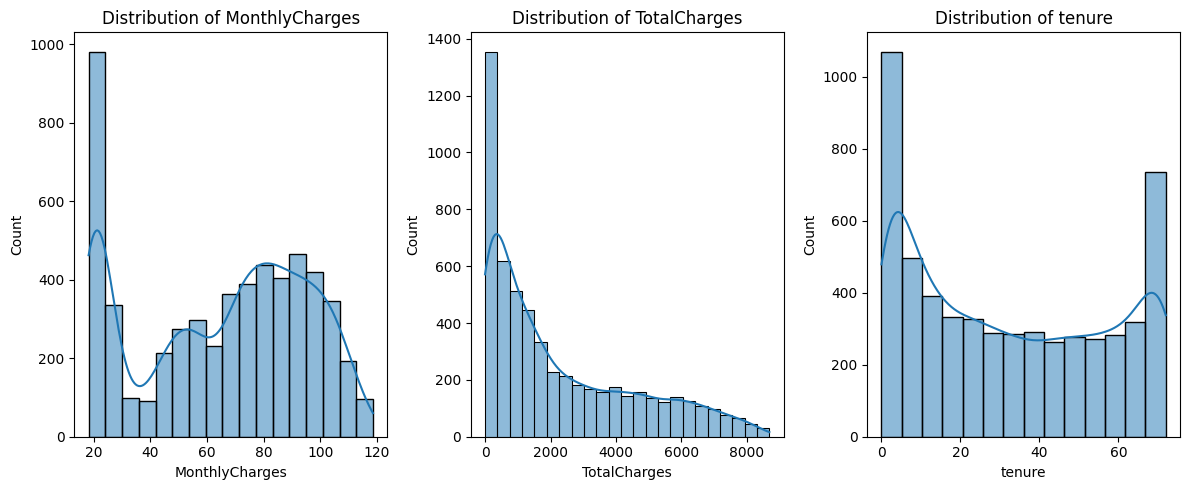

In [16]:
# viewing the distribution of numeric features
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

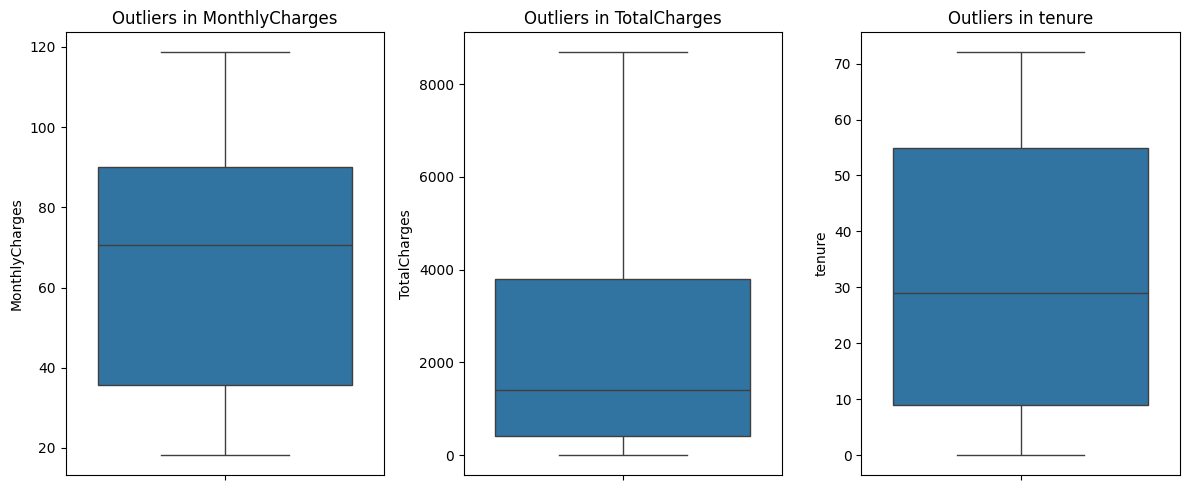

In [17]:
# checking for outliers in numeric features
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, feature in enumerate(numeric_features):
    sns.boxplot(df[feature], ax=ax[i])
    ax[i].set_title(f'Outliers in {feature}')

plt.tight_layout()
plt.show()

In [18]:
# viewing the outliers in TotalCharges
iqr_outliers(df, 'TotalCharges')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
# viewing the outliers in MonthlyCharges
z_score_outliers(df, 'MonthlyCharges')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
# viewing the outliers in tenure
z_score_outliers(df, 'tenure')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


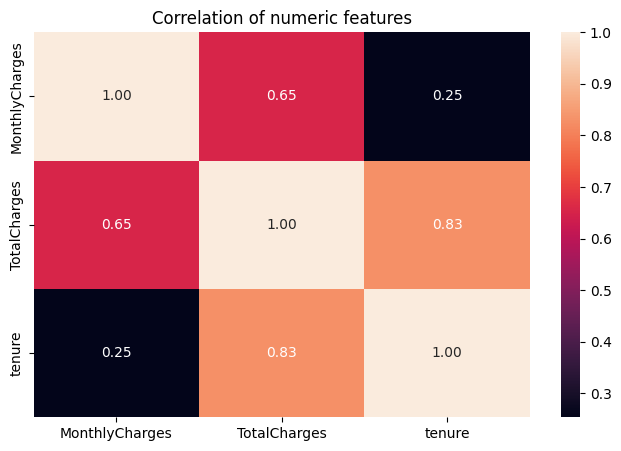

In [38]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt='.2f')
plt.title('Correlation of numeric features')
plt.show()

### Analysing Categorical Features

In [21]:
# checking class balance in target feature
df[target].value_counts()

Churn
No     4138
Yes    1496
Name: count, dtype: int64

In [22]:
# checking different values in categorical features
for feature in categorical_features:
    print('='*30)
    print(df[feature].value_counts())

print('='*30)

Contract
Month-to-month    3083
Two year          1339
One year          1212
Name: count, dtype: int64
Dependents
No     3951
Yes    1683
Name: count, dtype: int64
DeviceProtection
No                     2489
Yes                    1931
No internet service    1214
Name: count, dtype: int64
InternetService
Fiber optic    2481
DSL            1939
No             1214
Name: count, dtype: int64
MultipleLines
No                  2685
Yes                 2397
No phone service     552
Name: count, dtype: int64
OnlineBackup
No                     2448
Yes                    1972
No internet service    1214
Name: count, dtype: int64
OnlineSecurity
No                     2810
Yes                    1610
No internet service    1214
Name: count, dtype: int64
PaperlessBilling
Yes    3325
No     2309
Name: count, dtype: int64
Partner
No     2904
Yes    2730
Name: count, dtype: int64
PaymentMethod
Electronic check             1887
Mailed check                 1282
Bank transfer (automatic)    1238
Cr

In [29]:
# helper function for checking the count of different categories by Churn
def cat_churn_count(df, feature):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='Churn', data=df, palette=['red', 'blue'])
    plt.xticks(rotation=45)
    plt.title(f'Churn by {feature}')
    plt.show()

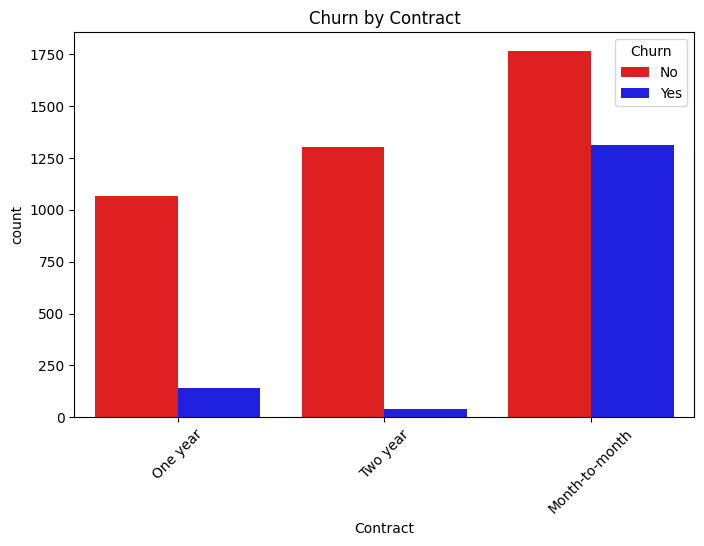

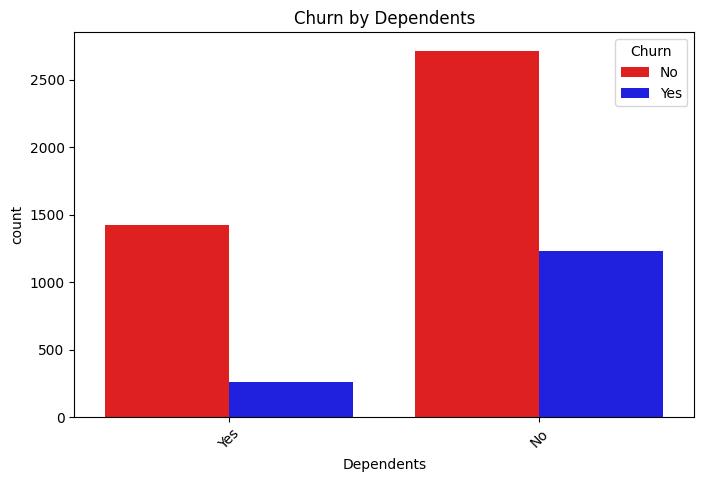

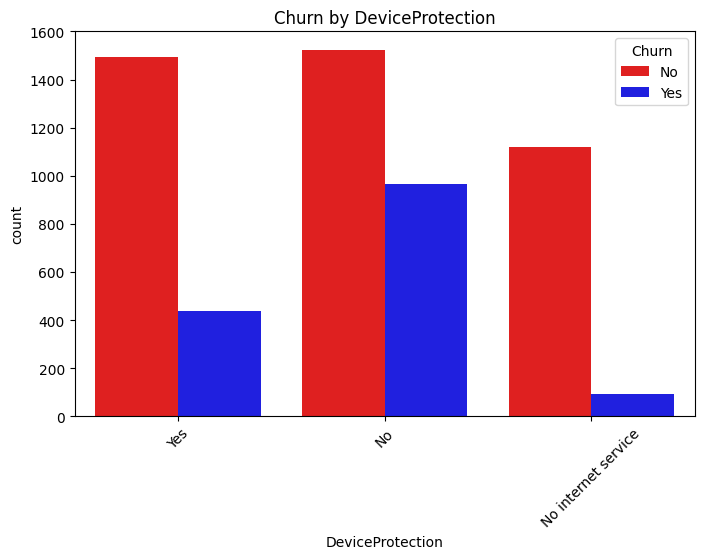

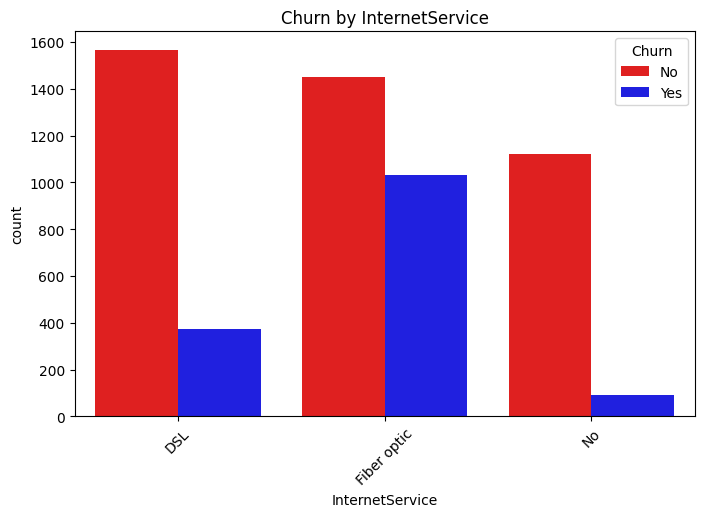

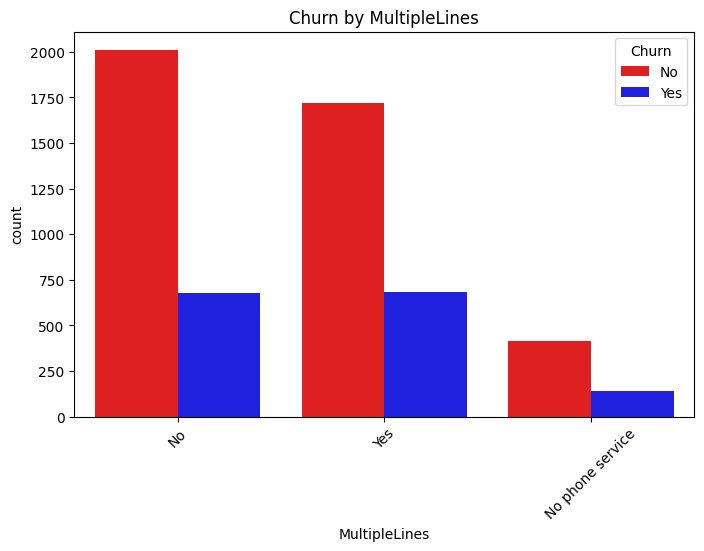

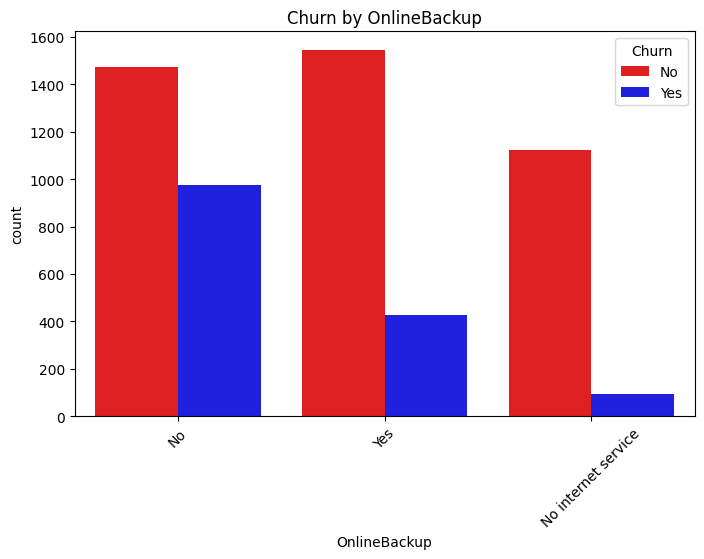

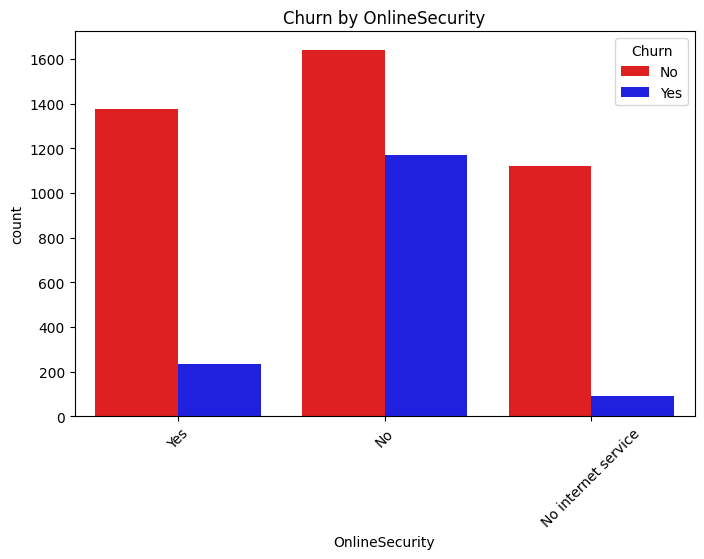

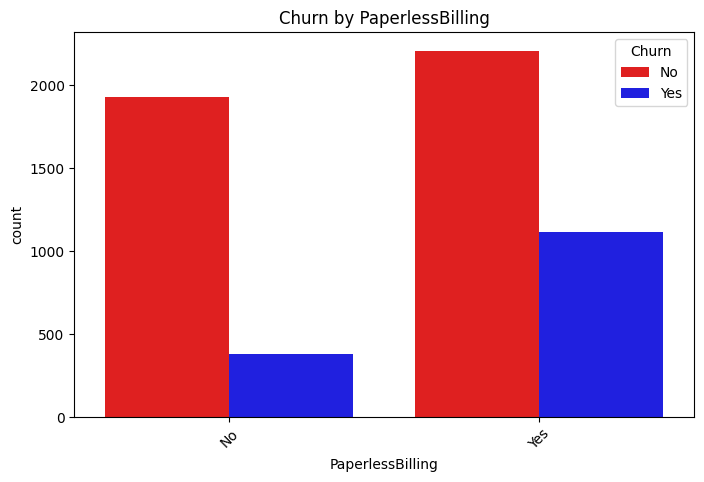

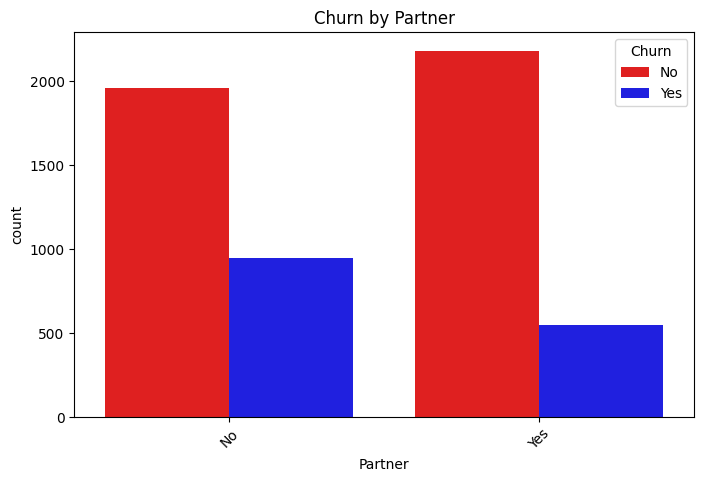

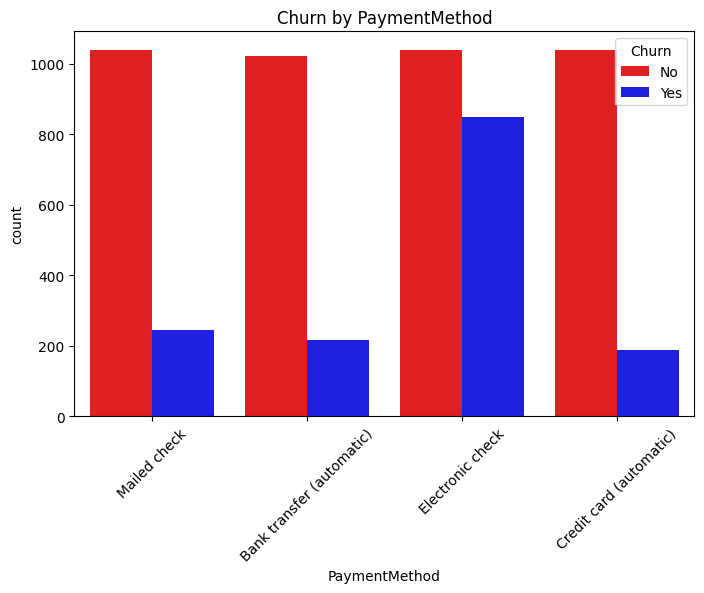

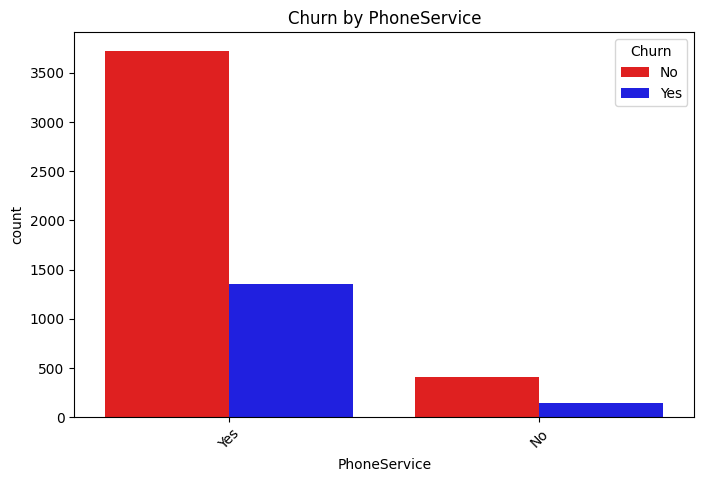

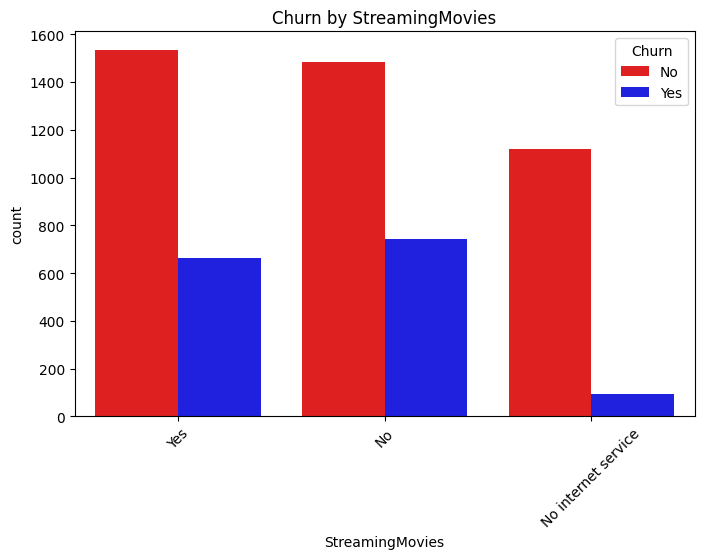

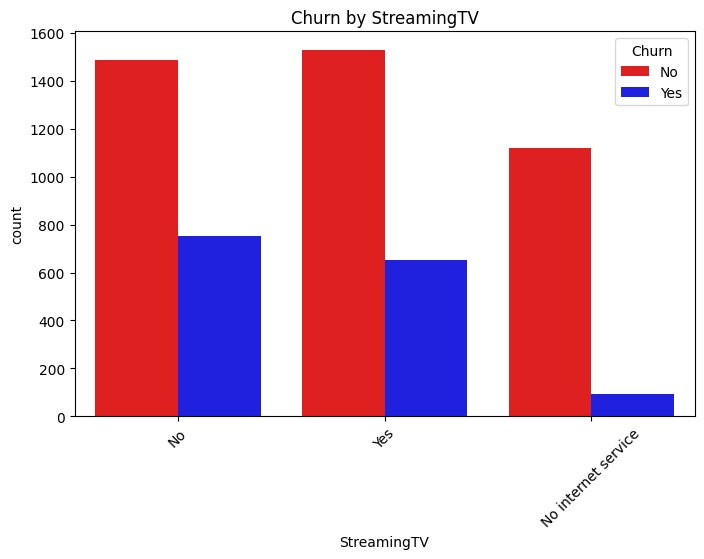

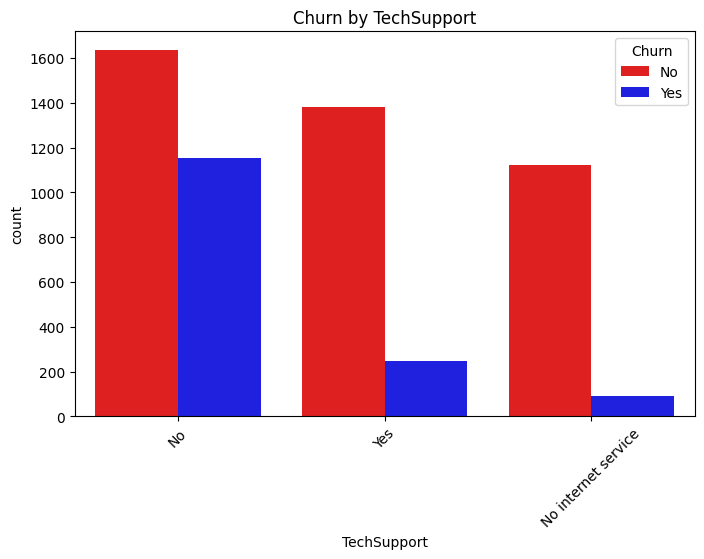

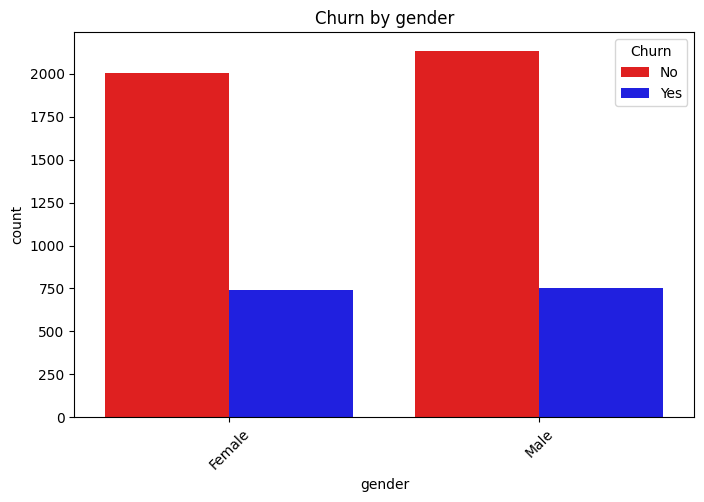

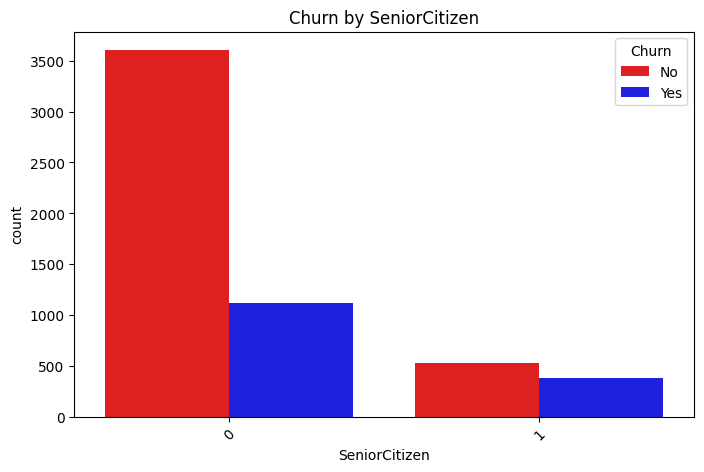

In [33]:
# checking the count of different categories by Churn
for feature in categorical_features:
    cat_churn_count(df, feature)